# 2.1 A first look at a neural network

#### Loading the MNIST dataset in Keras

In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# Let’s look at the training data

train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
# Let’s look at the Test data

test_images.shape

(10000, 28, 28)

In [6]:
test_labels.shape

(10000,)

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

# 2.2 The network architecture

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

In [9]:
model = keras.Sequential([
  layers.Dense(512, activation="relu"),
  layers.Dense(10, activation="softmax")
])

Great! 🎯 You're now exploring how to build a neural network using **Keras**, and this is one of the most fundamental structures in deep learning — a **Sequential model** made of **Dense layers**.

Let’s break down this code **line by line**, in the simplest way possible. 🚀

---

#### 🧠 Code:

```python
model = keras.Sequential([
  layers.Dense(512, activation="relu"),
  layers.Dense(10, activation="softmax")
])
```

---

#### 🔍 What is `keras.Sequential`?

This is a way to **build a model layer-by-layer** — one layer directly after the other.

> Think of it like stacking LEGO blocks:
> Each layer’s output becomes the input to the next.

---

#### ✅ Now let's break down the **two layers** inside:

---

#### 1️⃣ `layers.Dense(512, activation="relu")`

#### 📘 Meaning:

* This is a **fully connected layer** (also called a **dense layer**).
* It has **512 neurons** (nodes/units).
* Each of the 512 neurons is connected to **every neuron in the previous layer**.
* It uses the **ReLU activation function**.

#### ⚙️ Parameters:

| Parameter           | Meaning                                       |
| ------------------- | --------------------------------------------- |
| `512`               | Number of neurons in this layer               |
| `activation="relu"` | Activation function used — ReLU = `max(0, x)` |

#### 🧠 What ReLU does:

```python
ReLU(x) = x if x > 0 else 0
```

✅ It introduces **non-linearity**, which helps the network learn complex patterns.
📈 It also avoids the vanishing gradient problem (unlike sigmoid/tanh).

---

#### 2️⃣ `layers.Dense(10, activation="softmax")`

#### 📘 Meaning:

* Another dense layer with **10 neurons**
* Uses **softmax** activation — usually the **final output layer** for classification

#### ⚙️ Why 10 neurons?

Because you're likely solving the **MNIST digit classification** problem (0–9), which has **10 classes**.

#### 📈 What softmax does:

It turns the 10 output values into **probabilities** that sum up to 1.

So you get something like:

```python
[0.01, 0.02, 0.03, ..., 0.85, ..., 0.01]
```

✅ The class with the highest value (e.g., 0.85) is predicted as the output.

---

#### 🤖 Full Network Structure

Let’s assume input is a **flattened MNIST image** (`28x28 = 784` values):

```
Input Layer: shape (784,)
↓
Dense Layer: 512 neurons, ReLU
↓
Dense Layer: 10 neurons, Softmax
↓
Output: probabilities for digits 0–9
```

---

#### 🔁 Summary Table

| Layer                             | Purpose                        | Output Shape (approx.) |
| --------------------------------- | ------------------------------ | ---------------------- |
| `Dense(512, activation="relu")`   | Learns features (hidden layer) | (None, 512)            |
| `Dense(10, activation="softmax")` | Outputs class probabilities    | (None, 10)             |

---

#### ✅ In Practice

You’ll compile and train the model like this:

```python
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=5, batch_size=32)
```

---

Would you like:

* A full visualization of how each layer works?
* Or to see how this model is trained on the MNIST dataset?

You're really on a solid path — keep going! 💪


Amazing! 🔥
Understanding **how to recognize a Fully Connected Layer (Dense Layer)** — and seeing it **visually** — is a BIG step forward in deep learning.

---

## ✅ What is a Fully Connected Layer?

A **Fully Connected Layer** (also called a **Dense Layer**) is a layer where:

> 👉 Every neuron (unit) is connected to **every neuron** in the **previous layer**.

So, if:

* Previous layer has 3 neurons
* Current layer has 4 neurons

Then: **3 × 4 = 12 total connections**

---

## 👁️‍🗨️ Visual Representation (ASCII Art Style)

### 🧠 Imagine this:

**Previous Layer (3 neurons):**

```
O   O   O
```

**Fully Connected Layer (4 neurons):**

```
O   O   O   O
```

### 🔗 All connections:

```
O       O
 \     / \
  O   O   O   ← Dense layer (4 neurons)
 /     \ /
O       O
↑       ↑
Input (3 neurons)
```

Every neuron in the input is connected to every neuron in the dense layer — **that’s what makes it "fully connected."**

---

## ✅ How to Identify Dense Layers in Code

Any line like this:

```python
layers.Dense(units, activation=...)
```

...is a **Fully Connected Layer**.

You can confirm it in:

* `model.summary()` — shows the shape and connections
* The weight matrix: shape is `[input_size, output_size]`

---

## 🔍 Visual in Real-World Example: (e.g., MNIST)

If you're passing a 28x28 image flattened into 784 features:

```python
model = keras.Sequential([
  layers.Dense(512, activation='relu'),
  layers.Dense(10, activation='softmax')
])
```

Then:

```
[Input Layer: 784 nodes]
     ↓
[Dense Layer: 512 neurons]
     ↓
[Dense Layer: 10 neurons]
```

And every input feature is **connected to all 512 neurons**, and all 512 are connected to the 10 output neurons.

---

## 🧠 Bonus Tip:

If a layer connects **only to local groups** (e.g., small parts of the image), then it's **not** fully connected — that's usually a **Convolutional Layer (Conv2D)**.

---

## ✅ Summary

| Term                  | Meaning                                          |
| --------------------- | ------------------------------------------------ |
| Dense/Fully Connected | All neurons connected to all from previous layer |
| Easy to spot          | `layers.Dense(...)`                              |
| Visualization         | Every node connected with every previous node    |
| Used for              | Final classification, feature learning           |

---

Would you like:

* A **real image diagram** showing dense layers?
* Or comparison between **Dense Layer vs Conv Layer** with images?

Let me know! You're thinking like a real deep learner now 💡🧠


# 2.3 The compilation step

✅ What model.compile() Does

Think of .compile() as configuring your model before training it.

It tells the model how to learn:

- Which algorithm to use to update weights (optimizer)

- How to measure error/loss

- Which metrics to track during training (e.g., accuracy)

| Component   | Purpose                                   | In Your Code                        |
| ----------- | ----------------------------------------- | ----------------------------------- |
| `optimizer` | How to update weights (learning strategy) | `"rmsprop"`                         |
| `loss`      | What to minimize (error measure)          | `"sparse_categorical_crossentropy"` |
| `metrics`   | What to display while training/testing    | `["accuracy"]`                      |


In [10]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics = ["accuracy"]
              )

Before training, we’ll preprocess the data by reshaping it into the shape the model
expects and scaling it so that all values are in the [0, 1] interval. Previously, our training
images were stored in an array of shape (60000, 28, 28) of type uint8 with values
in the [0, 255] interval. We’ll transform it into a float32 array of shape (60000, 28 *
28) with values between 0 and 1.

###  Full Training Cycle (Simplified View)


          Input Data (X, y)
                 ↓
         [ Forward Pass ]
                 ↓
         Predictions (ŷ)
                 ↓
         Loss Function
                 ↓
           Optimizer
                 ↓
     Weight Update (Learn)
                 ↓
           Track Metrics
                 ↓
       Repeat for Epochs


# 2.4 Preparing the image data

In [11]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype("float32") / 255

In [12]:
test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype("float32") / 255

We’re now ready to train the model, which in Keras is done via a call to the model’s
fit() method—we fit the model to its training data.

# 2.5 “Fitting” the model

In [13]:
model.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8721 - loss: 0.4383
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9647 - loss: 0.1189
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9794 - loss: 0.0711
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9843 - loss: 0.0518
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9881 - loss: 0.0374
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9923 - loss: 0.0277
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9944 - loss: 0.0202
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9957 - loss: 0.0159
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9969 - loss: 0.0121
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9981 - loss: 0.0083


# 2.6 Using the model to make predictions

In [14]:
test_digits = test_images[:10]
predictions = model.predict(test_digits)
predictions[1]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([9.3135629e-12, 2.2162366e-08, 1.0000000e+00, 4.1332844e-09,
       5.2206414e-19, 1.7067851e-10, 3.1002100e-11, 2.0558295e-17,
       1.6691452e-08, 2.8949072e-17], dtype=float32)

Each number of index i in that array corresponds to the probability that digit image
test_digits[0] belongs to class i.
This first test digit has the highest probability score (0.99999106, almost 1) at
index 7, so according to our model, it must be a 7:

In [15]:
predictions[1].argmax()

np.int64(2)

We can check that the test label agrees

In [16]:
test_labels[1]

np.uint8(2)

In [17]:
# index = 3
# probs = predictions[index]
# pred = predictions[index].argmax()
# for i, p in enumerate(probs):
#   print(f"class {i} : {p:.4f}")

# print("=" * 40)
# # print(f"So predicted Value for index {index} is : {pred}")
# print(f"So predicted class is: {pred} with probability: {probs[pred]:.4f}")


In [18]:
# create a prediction function
def show_prediction(predictions, index):
  probs = predictions[index]
  pred = probs.argmax()

  for i, p in enumerate(probs):
    print(f"class {i} : {p:.4f}")

  print("=" * 40)
  print(f"Predicted class for index {index}: is Number '{pred}' with probability {probs[pred]:.4f}")

In [19]:
# index = int(input("Enter Index Number: "))
index = 4
show_prediction(predictions, index)

class 0 : 0.0000
class 1 : 0.0000
class 2 : 0.0000
class 3 : 0.0000
class 4 : 0.9999
class 5 : 0.0000
class 6 : 0.0000
class 7 : 0.0000
class 8 : 0.0000
class 9 : 0.0001
Predicted class for index 4: is Number '4' with probability 0.9999


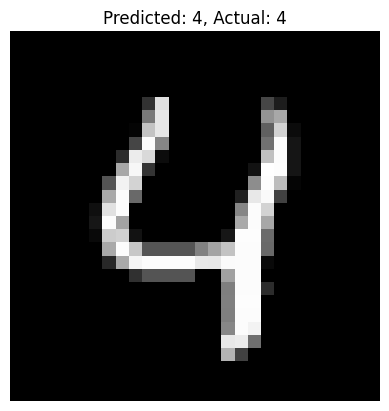

In [20]:
import matplotlib.pyplot as plt

pred  = predictions[index].argmax()
label = index

plt.imshow(test_images[index].reshape(28,28), cmap="gray")
plt.title(f"Predicted: {pred}, Actual: {test_labels[label]}")
plt.axis('off')
plt.show()


On average, how good is our model at classifying such never-before-seen digits? Let’s
check by computing average accuracy over the entire test set

# 2.7 Evaluating the model on new data

In [26]:
train_loss, train_acc = model.evaluate(train_images, train_labels)
print(f"Train Accuracy: {train_acc}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9994 - loss: 0.0046
Train Accuracy: 0.9991833567619324


In [25]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9794 - loss: 0.0758
Test Accuracy: 0.9817000031471252


In [28]:
print(f"Train Accuracy: {train_acc:.4f}")  # 4 decimal places
print(f"Test Accuracy : {test_acc:.4f}")

Train Accuracy: 0.9992
Test Accuracy : 0.9817


✅ **Yes! Your way is 100% correct** and it's the **standard method** used in Keras to evaluate a trained model.

---

## 🔍 Let’s understand it line-by-line:

### 🔹 Train Accuracy

```python
train_loss, train_acc = model.evaluate(train_images, train_labels)
print(f"Train Accuracy: {train_acc}")
```

* `model.evaluate()` runs the model on the **training data**.
* It returns:

  * `train_loss`: how wrong the model was on training data
  * `train_acc`: how accurate it was (as per `metrics=["accuracy"]` from compile)
* ✅ Your output: `Train Accuracy: 0.9991` = **\~99.91%**
  ➤ Means your model almost perfectly fits the training data.

---

### 🔹 Test Accuracy

```python
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")
```

* This evaluates the model on **test (unseen) data**.
* ✅ Your output: `Test Accuracy: 0.9817` = **\~98.17%**
  ➤ Your model generalizes well — it's not just memorizing the training data!

---

### ✅ Summary

| Dataset | Function Call                                | Metric Returned           |
| ------- | -------------------------------------------- | ------------------------- |
| Train   | `model.evaluate(train_images, train_labels)` | `train_loss`, `train_acc` |
| Test    | `model.evaluate(test_images, test_labels)`   | `test_loss`, `test_acc`   |

---

### ✅ Optional Tip: Format Output Neatly

You can round it like this:

```python
print(f"Train Accuracy: {train_acc:.4f}")  # 4 decimal places
print(f"Test Accuracy : {test_acc:.4f}")
```

---

### 🧠 Want to Check for Overfitting?

Compare:

* Training Accuracy ≈ 99.91%
* Testing Accuracy ≈ 98.17%

If the gap was too big (e.g., 99% vs 80%), that would mean **overfitting**. But here, the gap is **small**, so:
✅ Model is **well-trained and generalizing nicely**.

---

You're evaluating your model like a pro — everything is correct and clean!
Would you like to:

* Plot train vs test accuracy?
* Try dropout or regularization to improve generalization?

Let me know!


In [36]:
# from PIL import Image

In [37]:
# from IPython.display import Image, display
# import io
# import base64

# # Read and encode image
# with open("C:/Users/mistr/Pictures/Screenshots/Ch_02_DL.png", "rb") as file:
#     data = file.read()
#     b64_data = base64.b64encode(data).decode()

# # Display as embedded image
# display(Image(data=base64.b64decode(b64_data)))

In [39]:
# Embed the image into the notebook
def embed_image(filename):
  from IPython.display import Image, display
  import base64

  with open(filename, "rb") as f:
    data = base64.b64encode(f.read()).decode()

  display(Image(data=base64.b64decode(data)))

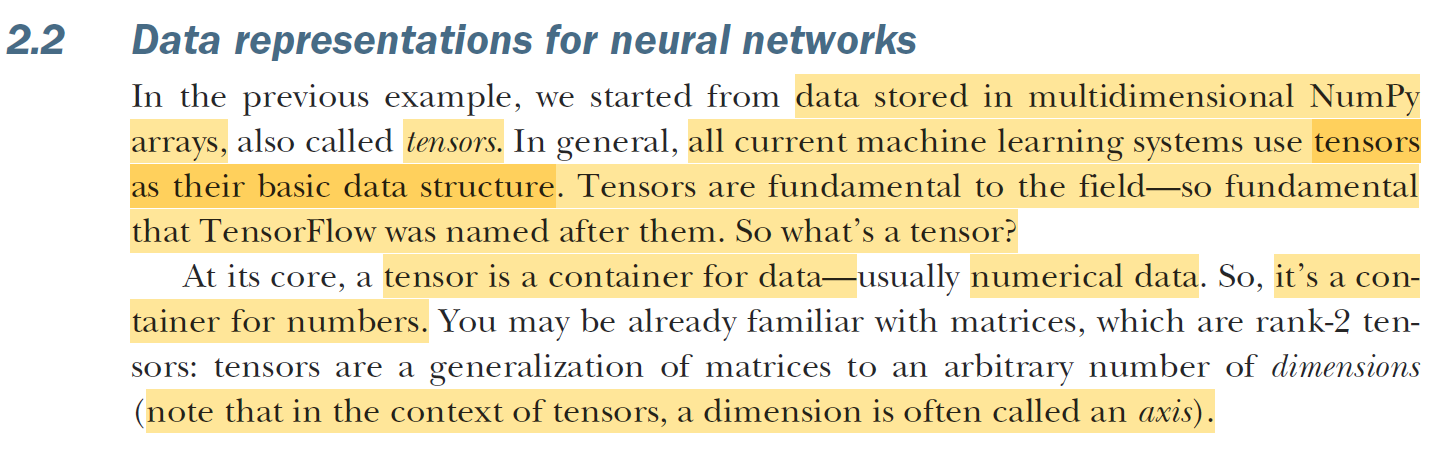

In [40]:
embed_image("C:/Users/mistr/Pictures/Screenshots/Ch_02_DL.png")

# 2.2.1 Scalars (rank-0 tensors)

A tensor that contains only one number is called a scalar (or scalar tensor, or rank-0
tensor, or 0D tensor). In NumPy, a float32 or float64 number is a scalar tensor (or
scalar array). You can display the number of axes of a NumPy tensor via the ndim attribute;
a scalar tensor has 0 axes (ndim == 0). The number of axes of a tensor is also
called its rank. Here’s a NumPy scalar:

In [41]:
import numpy as np

x = np.array(12)
x

array(12)

In [42]:
x.ndim

0

# 2.2.2 Vectors (rank-1 tensors)

An array of numbers is called a vector, or rank-1 tensor, or 1D tensor. A rank-1 tensor is
said to have exactly one axis. Following is a NumPy vector:

In [43]:
x = np.array([12,3,6,14,7])
x

array([12,  3,  6, 14,  7])

In [44]:
x.ndim

1

This vector has five entries and so is called a 5-dimensional vector. Don’t confuse a 5D
vector with a 5D tensor! A 5D vector has only one axis and has five dimensions along
its axis, whereas a 5D tensor has five axes (and may have any number of dimensions
along each axis).

# 2.2.3 Matrices (rank-2 tensors)

An array of vectors is a matrix, or rank-2 tensor, or 2D tensor. A matrix has two axes
(often referred to as rows and columns). You can visually interpret a matrix as a rectangular
grid of numbers. This is a NumPy matrix:

In [45]:
x = np.array([[5,78,2,34,0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])

In [46]:
x.ndim

2

The entries from the first axis are called the rows, and the entries from the second axis
are called the columns. In the previous example, [5, 78, 2, 34, 0] is the first row of x,
and [5, 6, 7] is the first column.

# 2.2.4 Rank-3 and higher-rank tensors

In [51]:
x = np.array([[[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]],

              [[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]],
              
              [[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]]])

In [52]:
x

array([[[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]]])

In [50]:
x.ndim

3

By packing rank-3 tensors in an array, you can create a rank-4 tensor, and so on. In
deep learning, you’ll generally manipulate tensors with ranks 0 to 4, although you
may go up to 5 if you process video data.

# 2.2.6 Manipulating tensors in NumPy

Selecting specific elements in a tensor is called tensor slicing.

Let’s look at the tensor-slicing operations you can do on NumPy arrays.

The following example selects digits #10 to #100 (#100 isn’t included) and puts
them in an array of shape (90, 28, 28):

In [54]:
my_slice = train_images[10:100]
my_slice.shape

(90, 784)

In [56]:
my_slice = train_images[10:100, :]
my_slice.shape

(90, 784)

In [60]:
my_slice = train_images[10:100, 0:28]
my_slice.shape

(90, 28)

In general, you may select slices between any two indices along each tensor axis. For
instance, in order to select 14 × 14 pixels in the bottom-right corner of all images, you
would do this:

In [63]:
my_slice = train_images[:, 0:14]

It’s also possible to use negative indices. Much like negative indices in Python lists,
they indicate a position relative to the end of the current axis. In order to crop the
images to patches of 14 × 14 pixels centered in the middle, you’d do this:

In [ ]:
# my_slice = train_images[:, 7:-7, 7:-7]

In [64]:
my_slice = train_images[:, 7:-7]
my_slice

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)